<a href="https://colab.research.google.com/github/Virtigox/Machine_Learning_Gym/blob/main/fcc_cat_dog01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))


Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [16]:
# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Scrutinize the Data

In [ ]:
from matplotlib.colors import Image
class_name = ['Cat','Dog']
test_dir = '/content/cats_and_dogs/test'
train_cat_dir = '/content/cats_and_dogs/train/cats'
train_dog_dir = '/content/cats_and_dogs/train/dogs'
validation_cat_dir = "/content/cats_and_dogs/validation/cats"
validation_dog_dir = "/content/cats_and_dogs/validation/dogs"

# load images from the directory

def load_image_from_directory(directory_path,label):
  images = []
  labels  = []
  for image_file in os.listdir(directory_path):
    image_path = os.path.join(directory_path,image_file)
    image = Image.open(image_path)
    image = np.array(image)
    image = image/255.0
    images.append(image)
    labels.append(label)

  return images,labels

# making specific compactable dataset
train_cat_image, train_cat_label = load_image_from_directory(train_cat_dir, label= class_name[0])
train_dog_image, train_dog_label = load_image_from_directory(train_dog_dir, label=class_name[1] )
valid_cat_image, valid_cat_label = load_image_from_directory(validation_cat_dir, label = class_name[0])
valid_dog_image, valid_dog_label = load_image_from_directory(validation_dog_dir, label = class_name[1])

# total valid/train dataset

train_images = train_cat_image + train_dog_image
train_labels = train_cat_label + train_dog_label
validation_images = valid_cat_image + valid_dog_image
validation_labels = valid_cat_label + valid_dog_label


# look into the Image

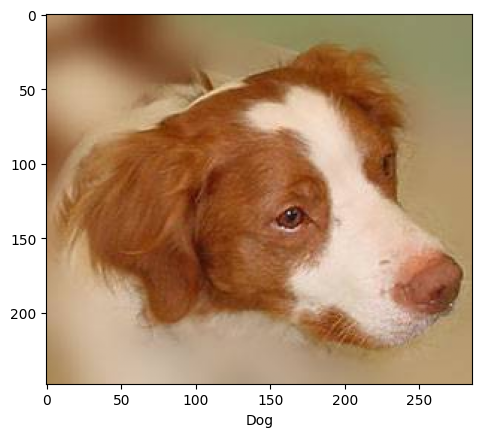

In [ ]:
# Let look at a one image
IMG_INDEX = 1000 # change this to look at the other images


plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(train_labels[IMG_INDEX])
plt.show()

In [5]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator  = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='binary')

val_data_gen= validation_image_generator .flow_from_directory(
                                                         validation_dir,
                                                         batch_size = batch_size,
                                                         target_size = (IMG_HEIGHT,IMG_WIDTH),
                                                         class_mode = "binary")
# this is so wierd
test_data_gen = test_image_generator.flow_from_directory(
    PATH,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size = batch_size ,
    classes = ['test'],
    shuffle=False
    )






Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


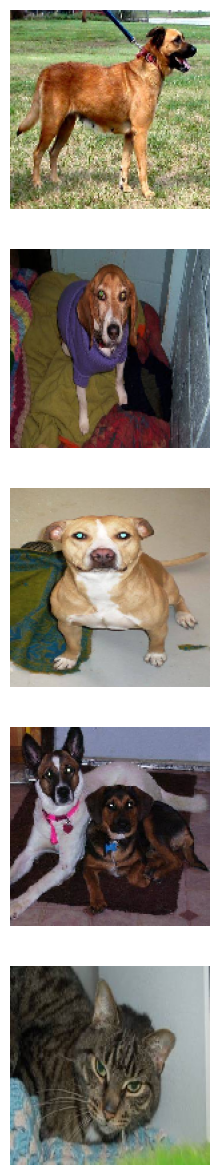

In [6]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen) # train_data_gen has to chage train_image_generator
plotImages(sample_training_images[:5])


In [7]:
# 5 Preparing traning Images into various transformations in order not to overfitting with less training Images
train_image_generator = ImageDataGenerator( rescale= 1./255,
                                            rotation_range=40,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True,
                                            fill_mode='nearest')

Found 2000 images belonging to 2 classes.


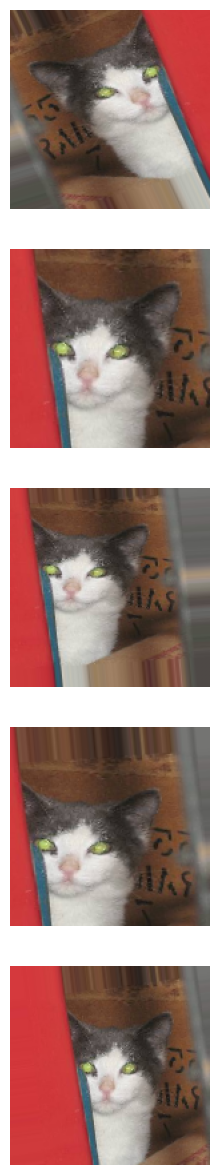

In [8]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [20]:

model = Sequential()

# input > convo > pooling > cono > pooling > convo > pooling > flatten > dense
# Convolutions
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Optimizer
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [19]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
# Define the learning rate schedule function
def schedule(epoch, lr):
    if epoch < 5:
        return lr  # Keep the initial learning rate for the first 5 epochs
    else:
        return lr * 0.1  # Reduce the learning rate by a factor of 0.1 after the 5th epoch
# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(schedule)

# Create the early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [10]:
#steps_per_epoches
steps_per_epoch= int(round(1.* total_train/ batch_size))
val_steps = int(round(1. * total_val/ batch_size))
print(steps_per_epoch, val_steps)

16 8


In [21]:
# 8

history = model.fit(
          train_data_gen,
          steps_per_epoch = steps_per_epoch,#steps_per_epoch=train_steps,
          validation_data=val_data_gen,
          validation_steps = val_steps,#validation_steps=val_steps,
          epochs=epochs,
           callbacks=[lr_scheduler, early_stopping])

Epoch 1/15
16/16 [==============================] - 19s 1s/step - loss: 1.9068 - accuracy: 0.5100 - val_loss: 0.7134 - val_accuracy: 0.5210 - lr: 0.0010
Epoch 2/15
16/16 [==============================] - 16s 970ms/step - loss: 0.6840 - accuracy: 0.5730 - val_loss: 0.6513 - val_accuracy: 0.5950 - lr: 0.0010
Epoch 3/15
16/16 [==============================] - 15s 973ms/step - loss: 0.6729 - accuracy: 0.5920 - val_loss: 0.6334 - val_accuracy: 0.6320 - lr: 0.0010
Epoch 4/15
16/16 [==============================] - 15s 960ms/step - loss: 0.6652 - accuracy: 0.5820 - val_loss: 0.6337 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 5/15
16/16 [==============================] - 15s 963ms/step - loss: 0.6542 - accuracy: 0.6070 - val_loss: 0.6232 - val_accuracy: 0.6410 - lr: 0.0010
Epoch 6/15
16/16 [==============================] - 16s 958ms/step - loss: 0.6460 - accuracy: 0.6045 - val_loss: 0.6271 - val_accuracy: 0.6270 - lr: 1.0000e-04
Epoch 7/15
16/16 [==============================] - 15s 962ms/s

ValueError: ignored

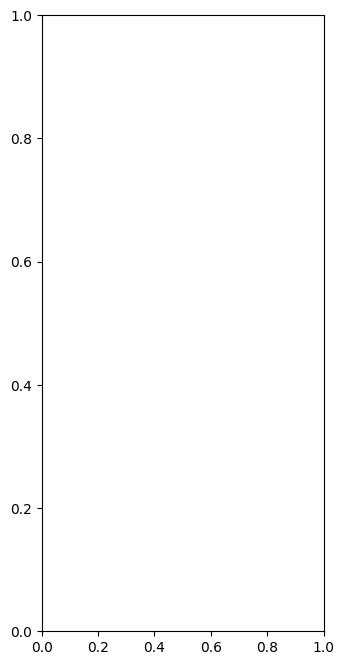

In [22]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
probabilities = model.predict(test_data_gen)
probabilities

1/1 [==============================] - 0s 176ms/step


array([[0.3868101 ],
       [0.22865058],
       [0.49624473],
       [0.70822847],
       [0.5689039 ],
       [0.48079786],
       [0.58122253],
       [0.26988515],
       [0.55432045],
       [0.6000787 ],
       [0.5832461 ],
       [0.5603064 ],
       [0.42064428],
       [0.22867621],
       [0.46508944],
       [0.5523145 ],
       [0.50256115],
       [0.6143493 ],
       [0.5585506 ],
       [0.52613306],
       [0.43698588],
       [0.5578727 ],
       [0.3947301 ],
       [0.5312848 ],
       [0.50651735],
       [0.52641517],
       [0.8598216 ],
       [0.30335835],
       [0.35871077],
       [0.39436555],
       [0.4516474 ],
       [0.45198682],
       [0.61116725],
       [0.9276834 ],
       [0.3563948 ],
       [0.61175865],
       [0.81449026],
       [0.61624706],
       [0.37978348],
       [0.4698711 ],
       [0.4052051 ],
       [0.52870494],
       [0.7079397 ],
       [0.5119303 ],
       [0.59371215],
       [0.43258274],
       [0.40766796],
       [0.543

In [ ]:
plt.plot(test_data_gen,probabilities)

In [24]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round_(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
